# Brandon Vasquez

### The following work was done without collaboration from other peers within the class but with aid from the SciKit library documentation page for the various methods, variables, and functions used.

## Sources used (among the documentation of the various libraries included):
* [Plot multi-class SGD on the iris dataset from SciKit Documentation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html)
* [Basically what we have to do...but for the SVM classifier](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)
* [StackOverflow fixing legends in plots](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot)



In [17]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [18]:
iris_data = datasets.load_iris()
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

match_targets = np.array([iris_data.target_names[target] for target in iris_data.target]) # match each target name to the respective target index
iris_df = pd.DataFrame(iris_data.data, columns=features, index=match_targets)

compiled_accurracies = []
print(type(iris_df), iris_df[['Sepal Length', 'Sepal Width']])
print(match_targets, len(match_targets))

<class 'pandas.core.frame.DataFrame'>            Sepal Length  Sepal Width
setosa              5.1          3.5
setosa              4.9          3.0
setosa              4.7          3.2
setosa              4.6          3.1
setosa              5.0          3.6
...                 ...          ...
virginica           6.7          3.0
virginica           6.3          2.5
virginica           6.5          3.0
virginica           6.2          3.4
virginica           5.9          3.0

[150 rows x 2 columns]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor

In [19]:
# helper functions here....
def addScore(clf: str, test_s: float, train_s: float) -> None:
    compiled_accurracies.append({
        'clf': clf,
        'test_accu': test_s,
        'train_accu': train_s
    })
    return None

def implementation_of_score_func(*arrays) -> float: #just for fun implementing the score function for SGD using predict
    out = [1 if predict == arrays[-1][i] else 0 for i, predict in enumerate(arrays[0])]
    return out.count(1) / len(out)

def fit_and_plot_2d(clf, X, y, xlabel, ylabel, title=''): #fit to the classifier and plot on 2d scatter plot
    #modified from original so that it fits the model beforehand as well as takes in a title parameter for more customization of outputted plot
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.Paired,
        ax=plt.gca(),
        response_method="predict",
        xlabel=xlabel,
        ylabel=ylabel,
    )

    #plot the data we used in training
    for species, color in zip(clf.classes_, ["lightblue", "red", "brown"]):
        idx = np.where(y == species)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            edgecolor="black",
            label=species,
            s=20,
        )
    plt.title(f'{title}(score {round(clf.score(X, y), 3)})')
    plt.legend()
    plt.show()

In [20]:
sep_feats = iris_df[['Sepal Length', 'Sepal Width']] # plot this
print(type(sep_feats), sep_feats[::10])

<class 'pandas.core.frame.DataFrame'>             Sepal Length  Sepal Width
setosa               5.1          3.5
setosa               5.4          3.7
setosa               5.4          3.4
setosa               4.8          3.1
setosa               5.0          3.5
versicolor           7.0          3.2
versicolor           5.0          2.0
versicolor           5.9          3.2
versicolor           5.5          2.4
versicolor           5.5          2.6
virginica            6.3          3.3
virginica            6.5          3.2
virginica            6.9          3.2
virginica            7.4          2.8
virginica            6.7          3.1


In [21]:
# Splitting the dataset into test and training and converting the feature dataset into a numpy array
# in order to only hold onto the values and not the features (if kept it warnings may be thrown later on about invalid features)

X_train,X_test,y_train,y_test = train_test_split(sep_feats, match_targets, test_size=0.2, random_state=805)
X_train = X_train.to_numpy() #drop labels and turn from df to ndarray
X_test = X_test.to_numpy()

In [22]:
print(X_train.shape, X_train[::5], '\n\nTraining features\n\n') # plot this
print(y_train.shape, y_train[::5], '\n\nTraining labels')

(120, 2) [[4.9 2.4]
 [6.8 3.2]
 [5.1 3.5]
 [5.3 3.7]
 [6.  3. ]
 [4.9 3.6]
 [4.7 3.2]
 [6.7 3. ]
 [5.6 3. ]
 [5.1 3.8]
 [6.8 2.8]
 [4.9 2.5]
 [6.4 2.9]
 [6.5 3. ]
 [5.7 2.5]
 [7.1 3. ]
 [5.2 3.4]
 [6.3 2.3]
 [5.8 2.7]
 [6.9 3.1]
 [7.3 2.9]
 [5.  2. ]
 [4.6 3.1]
 [5.7 2.9]] 

Training features


(120,) ['versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'setosa' 'versicolor'] 

Training labels


In [23]:
print(X_test.shape, X_test[::2], '\n\nTraining features\n\n') # plot this
print(y_test.shape, y_test[::2], '\n\nTraining labels')

(30, 2) [[5.6 2.7]
 [6.6 3. ]
 [4.4 2.9]
 [5.5 2.6]
 [7.7 3.8]
 [5.4 3.9]
 [5.1 3.8]
 [7.2 3.2]
 [5.7 4.4]
 [5.1 3.7]
 [5.8 2.7]
 [7.2 3.6]
 [6.4 2.7]
 [5.  3.6]
 [7.4 2.8]] 

Training features


(30,) ['versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica'] 

Training labels


0.8166666666666667
0.7333333333333333
Testing 73.3
Training: 81.69999999999999


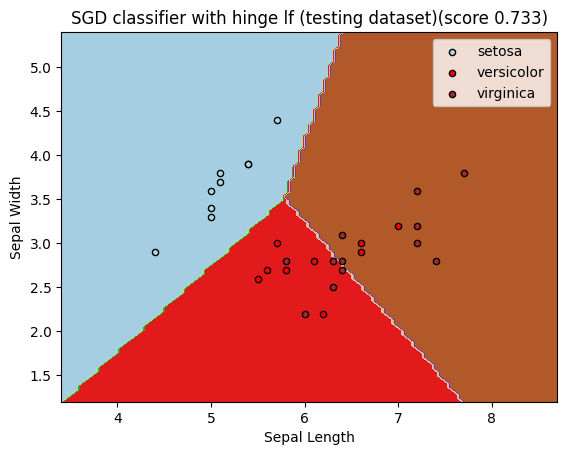

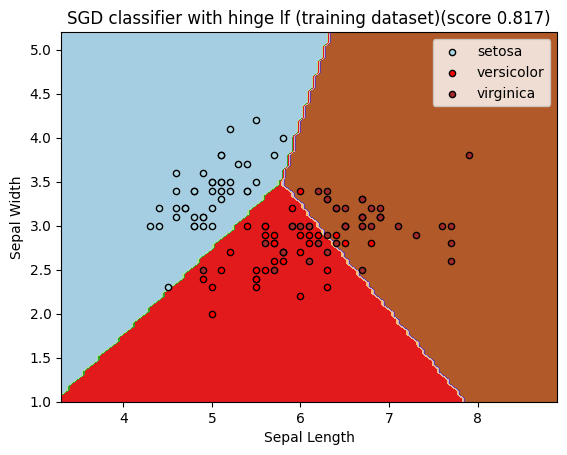

In [24]:
#SGD with hinge loss function
clf_hinge = SGDClassifier(loss="hinge", tol=None, random_state=107).fit(X_train, y_train)

print(accuracy_score(y_train, clf_hinge.predict(X_train)))
print(accuracy_score(y_test, clf_hinge.predict(X_test)))
print(f'Testing {round(clf_hinge.score(X_test, y_test), 3) * 100}\nTraining: {round(clf_hinge.score(X_train, y_train), 3) * 100}')
'''
Throughout this notebook you will find that I used the predit + accuracy score method to get the accuracy
as well as the score method. I did this as a sanity check just to make sure that these calculated the same value
'''

addScore('SGD_hinge', round(clf_hinge.score(X_test, y_test), 3) * 100, round(clf_hinge.score(X_train, y_train), 3) * 100)
clf_hinge.get_params()


fit_and_plot_2d(clf_hinge,  X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='SGD classifier with hinge lf (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(clf_hinge, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='SGD classifier with hinge lf (training dataset)')


0.825
0.8
Testing 80.0
Training: 82.5


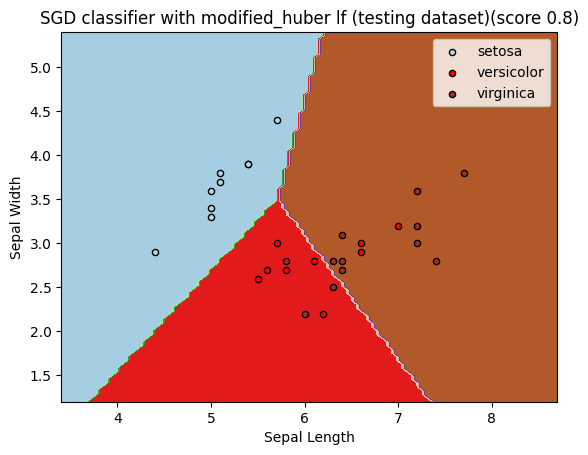

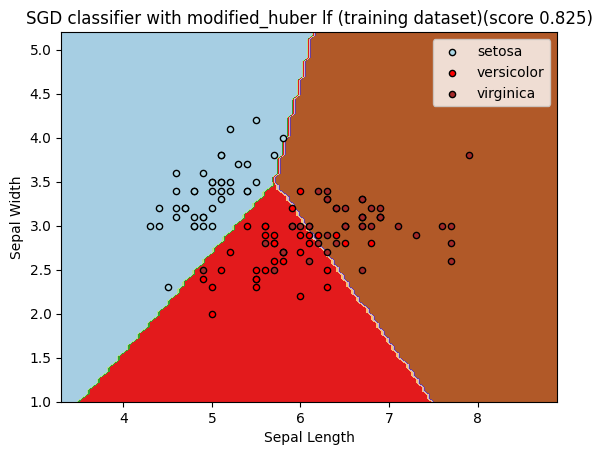

In [25]:
#SGD with modified huber loss function
clf_mod_huber = SGDClassifier(loss="modified_huber", tol=None, random_state=107).fit(X_train, y_train)
# random state is essentially the key value for replicating the shuffle so that results can be replicated

print(accuracy_score(y_train, clf_mod_huber.predict(X_train)))
print(accuracy_score(y_test, clf_mod_huber.predict(X_test)))
print(f'Testing {round(clf_mod_huber.score(X_test, y_test), 3) * 100}\nTraining: {round(clf_mod_huber.score(X_train, y_train), 3) * 100}')

addScore('SGD_mod_huber', round(clf_mod_huber.score(X_test, y_test), 3) * 100, round(clf_mod_huber.score(X_train, y_train), 3) * 100)
clf_mod_huber.get_params()

fit_and_plot_2d(clf_mod_huber,  X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='SGD classifier with modified_huber lf (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(clf_mod_huber, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='SGD classifier with modified_huber lf (training dataset)')


0.825
0.7333333333333333
Testing 73.3
Training: 82.5


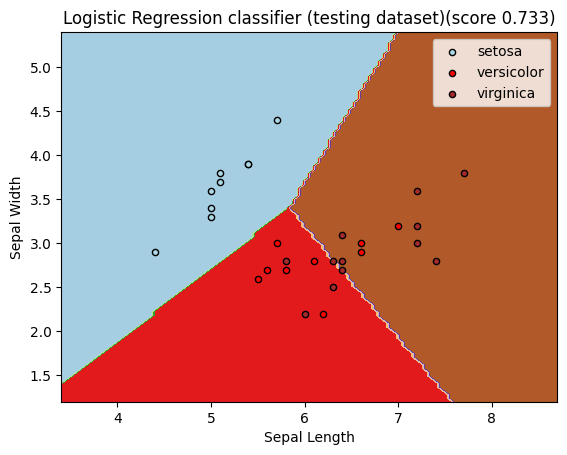

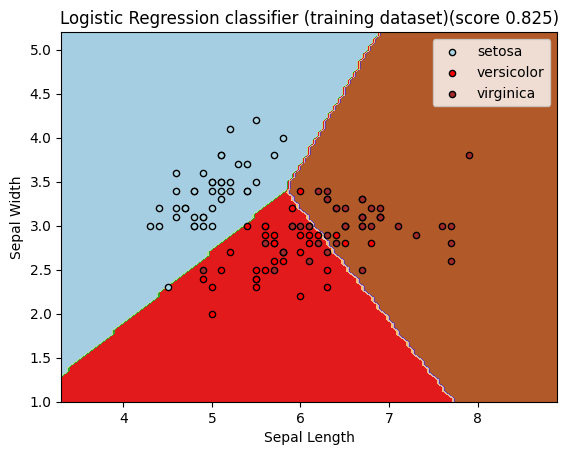

In [26]:
logist_clf = LogisticRegression(penalty='l2', solver='newton-cg', random_state=7).fit(X_train, y_train)

print(accuracy_score(y_train, logist_clf.predict(X_train)))
print(accuracy_score(y_test, logist_clf.predict(X_test)))
print(f'Testing {round(logist_clf.score(X_test, y_test), 3) * 100}\nTraining: {round(logist_clf.score(X_train, y_train), 3) * 100}')

addScore('Logistic Regression', round(logist_clf.score(X_test, y_test), 3)* 100, round(logist_clf.score(X_train, y_train), 3) * 100)

fit_and_plot_2d(logist_clf,  X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='Logistic Regression classifier (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(logist_clf, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='Logistic Regression classifier (training dataset)')

0.8333333333333334
0.7666666666666667
Testing 76.7
Training: 83.3


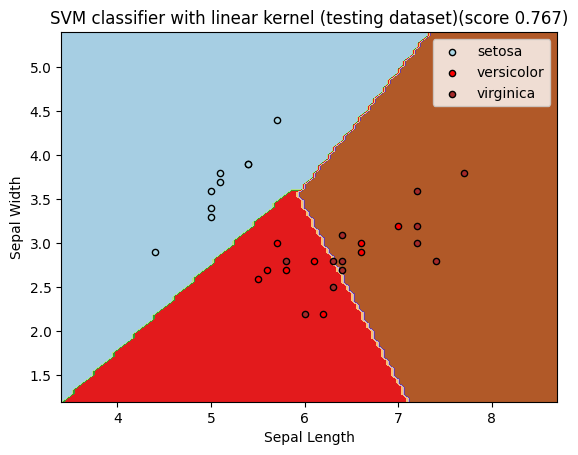

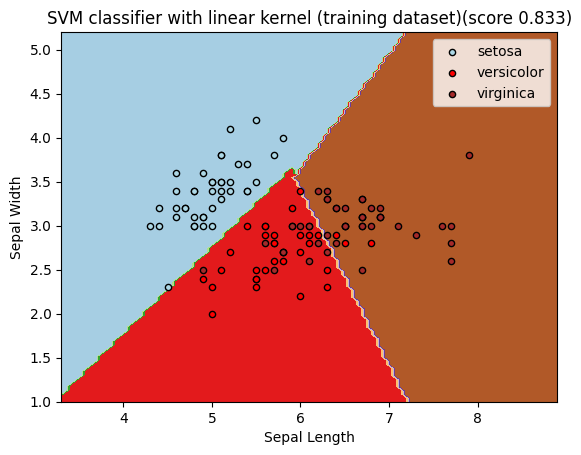

In [27]:
SVM_linker_clf = SVC(kernel='linear')
SVM_linker_clf = SVM_linker_clf.fit(X_train, y_train)

print(accuracy_score(y_train, SVM_linker_clf.predict(X_train)))
print(accuracy_score(y_test, SVM_linker_clf.predict(X_test)))
print(f'Testing {round(SVM_linker_clf.score(X_test, y_test), 3) * 100}\nTraining: {round(SVM_linker_clf.score(X_train, y_train), 3) * 100}')

addScore('SVM_linker_clf', round(SVM_linker_clf.score(X_test, y_test), 3)* 100, round(SVM_linker_clf.score(X_train, y_train), 3) * 100)

fit_and_plot_2d(SVM_linker_clf, X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='SVM classifier with linear kernel (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(SVM_linker_clf, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='SVM classifier with linear kernel (training dataset)')

0.8333333333333334
0.7333333333333333
Testing 73.3
Training: 83.3


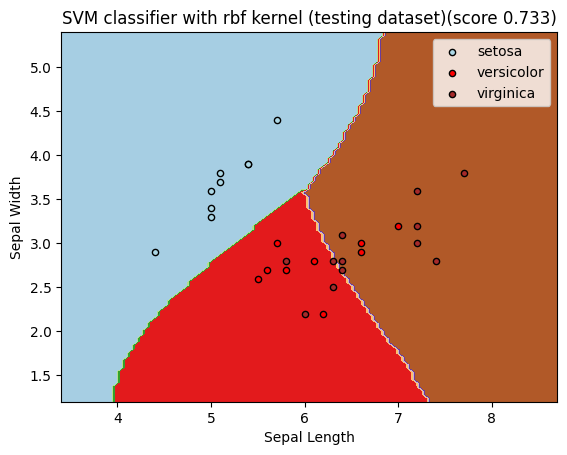

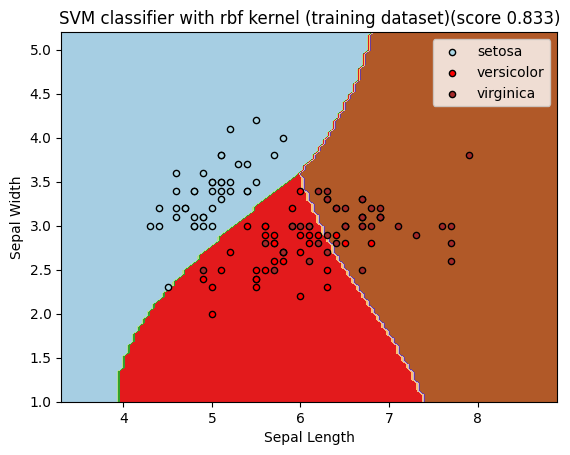

In [28]:
SVM_rbfker= SVC(kernel='rbf', gamma='auto') #gamma of auto allows it to use a 1 / n_features
SVM_rbfker = SVM_rbfker.fit(X_train, y_train)

print(accuracy_score(y_train, SVM_rbfker.predict(X_train)))
print(accuracy_score(y_test, SVM_rbfker.predict(X_test)))
print(f'Testing {round(SVM_rbfker.score(X_test, y_test), 3) * 100}\nTraining: {round(SVM_rbfker.score(X_train, y_train), 3) * 100}')

addScore('SVM_rbfker', round(SVM_rbfker.score(X_test, y_test), 3)* 100, round(SVM_rbfker.score(X_train, y_train), 3) * 100)
SVM_rbfker.get_params()

fit_and_plot_2d(SVM_rbfker, X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='SVM classifier with rbf kernel (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(SVM_rbfker, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='SVM classifier with rbf kernel (training dataset)')

0.9333333333333333
0.7333333333333333
Testing 73.3
Training: 93.30000000000001


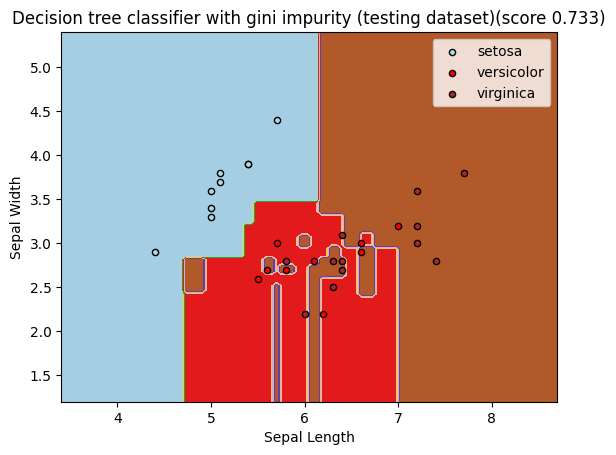

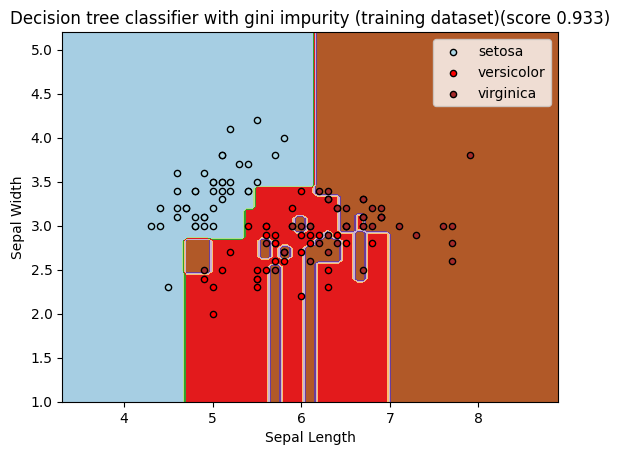

In [29]:
dec_tree_clf = DecisionTreeClassifier(criterion='gini')
dec_tree_clf = dec_tree_clf.fit(X_train, y_train)

print(accuracy_score(y_train, dec_tree_clf.predict(X_train)))
print(accuracy_score(y_test, dec_tree_clf.predict(X_test)))
print(f'Testing {round(dec_tree_clf.score(X_test, y_test), 3) * 100}\nTraining: {round(dec_tree_clf.score(X_train, y_train), 3) * 100}')

addScore('dec_tree_clf', round(dec_tree_clf.score(X_test, y_test), 3)* 100, round(dec_tree_clf.score(X_train, y_train), 3) * 100)
dec_tree_clf.get_params()

fit_and_plot_2d(dec_tree_clf, X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='Decision tree classifier with gini impurity (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(dec_tree_clf, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='Decision tree classifier with gini impurity (training dataset)')

0.8416666666666667
0.8333333333333334
Testing 83.3
Training: 84.2


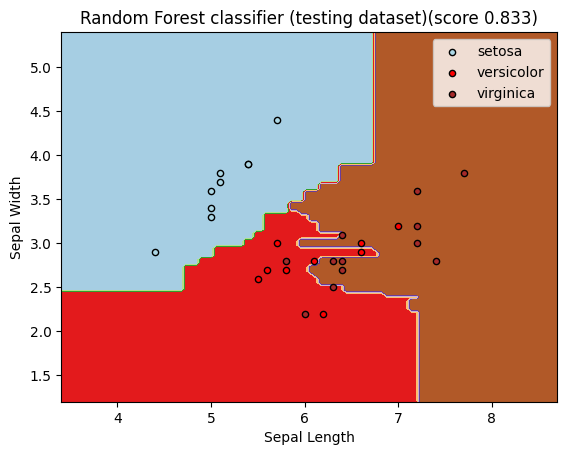

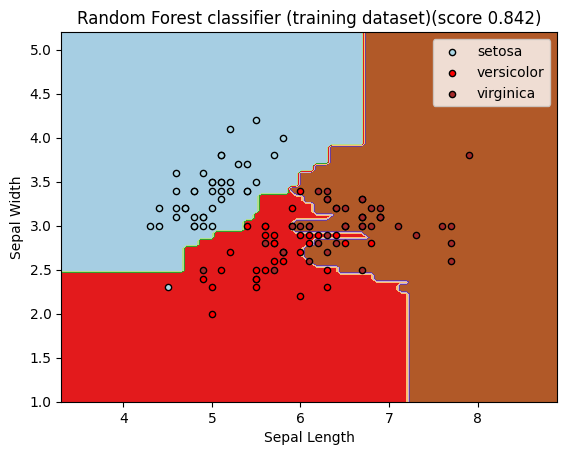

In [30]:
rf_clf = RandomForestClassifier(criterion='entropy', min_samples_split=8, n_estimators=100)
rf_clf = rf_clf.fit(X_train, y_train)

print(accuracy_score(y_train, rf_clf.predict(X_train)))
print(accuracy_score(y_test, rf_clf.predict(X_test)))
print(f'Testing {round(rf_clf.score(X_test, y_test), 3) * 100}\nTraining: {round(rf_clf.score(X_train, y_train), 3) * 100}')

addScore('rf_clf', round(rf_clf.score(X_test, y_test), 3)* 100, round(rf_clf.score(X_train, y_train), 3) * 100)
rf_clf.get_params()

fit_and_plot_2d(rf_clf, X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='Random Forest classifier (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(rf_clf, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='Random Forest classifier (training dataset)')

0.8333333333333334
0.8
Testing 80.0
Training: 83.3


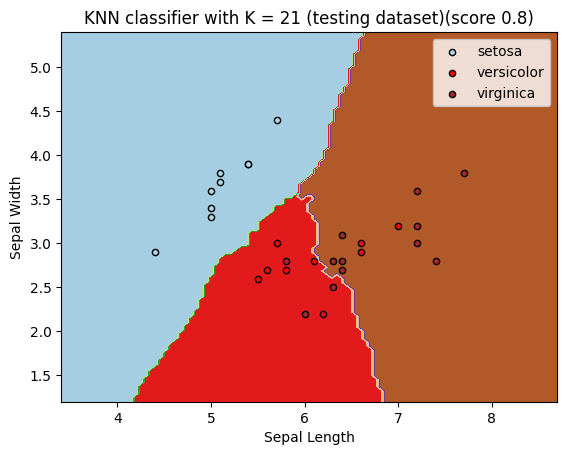

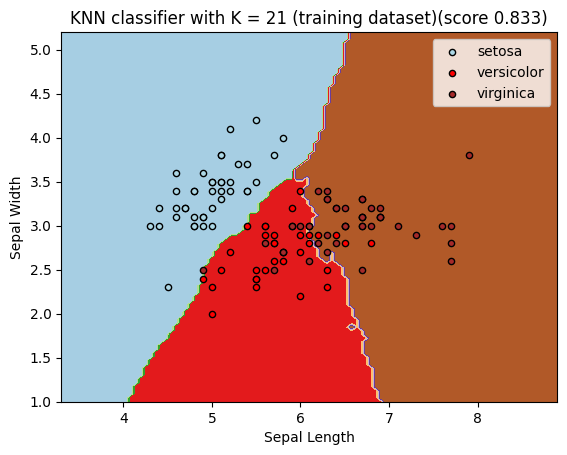

In [31]:
knn_clf_k21 = KNeighborsClassifier(n_neighbors=21).fit(X_train, y_train)

print(accuracy_score(y_train, knn_clf_k21.predict(X_train)))
print(accuracy_score(y_test, knn_clf_k21.predict(X_test)))
print(f'Testing {round(knn_clf_k21.score(X_test, y_test), 3) * 100}\nTraining: {round(knn_clf_k21.score(X_train, y_train), 3) * 100}')

addScore('knn_clf_k47', round(knn_clf_k21.score(X_test, y_test), 3)* 100, round(knn_clf_k21.score(X_train, y_train), 3) * 100)
knn_clf_k21.get_params()

fit_and_plot_2d(knn_clf_k21, X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='KNN classifier with K = 21 (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(knn_clf_k21, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='KNN classifier with K = 21 (training dataset)')

0.8416666666666667
0.7666666666666667
Testing 76.7
Training: 84.2


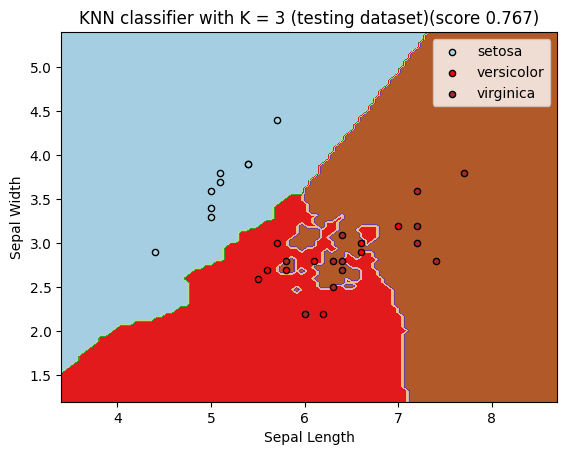

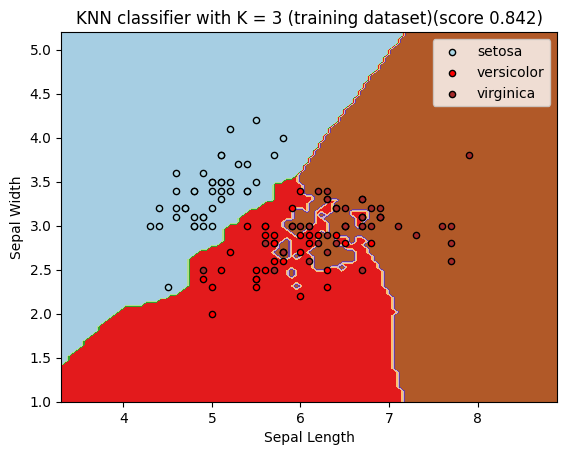

In [32]:
knn_clf_k3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

print(accuracy_score(y_train, knn_clf_k3.predict(X_train)))
print(accuracy_score(y_test, knn_clf_k3.predict(X_test)))
print(f'Testing {round(knn_clf_k3.score(X_test, y_test), 3) * 100}\nTraining: {round(knn_clf_k3.score(X_train, y_train), 3) * 100}')

addScore('knn_clf_k3', round(knn_clf_k3.score(X_test, y_test), 3)* 100, round(knn_clf_k3.score(X_train, y_train), 3) * 100)
knn_clf_k3.get_params()

fit_and_plot_2d(knn_clf_k3, X_test, y_test, xlabel='Sepal Length', ylabel='Sepal Width', title='KNN classifier with K = 3 (testing dataset)') #plot with the decisionboundary class
fit_and_plot_2d(knn_clf_k3, X_train, y_train, xlabel='Sepal Length', ylabel='Sepal Width', title='KNN classifier with K = 3 (training dataset)')

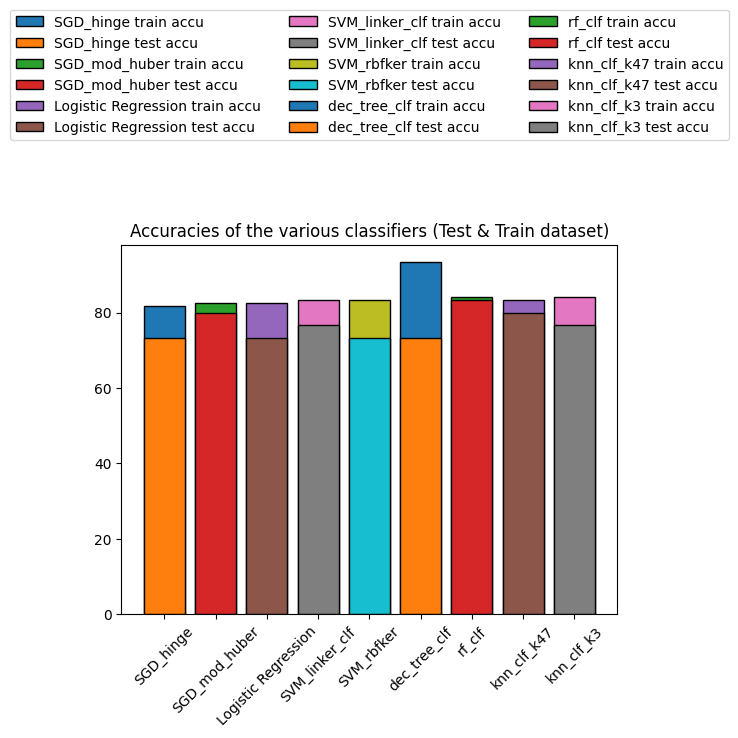

In [33]:
ax = plt.subplot()
for clf in compiled_accurracies:
    ax.bar(clf['clf'], clf['train_accu'], label=f'{clf['clf']} train accu', linewidth=1, edgecolor='black')
    ax.bar(clf['clf'], clf['test_accu'], label=f'{clf['clf']} test accu', linewidth=1, edgecolor='black')

x_labels = [clf['clf'] for clf in compiled_accurracies]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(x_labels, rotation=45)
ax.set_title('Accuracies of the various classifiers (Test & Train dataset)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.655), ncol=3)
plt.show()

# Discussion

## Variation in the accuracies of the SGD classifier
* Interestingly enough for both the SGD model when using the with the hinge loss function the variation in the accurracies always resulted in the training accuracy being higher than the testing accuracy. On the contrary, for hte

## Logistic Regression classifier

## SVM 

## Decision tree

## Random forest

## KNN

## Analysis and comparison of all classifiers




